# Introdução ao Geopandas

## O que são dados georreferenciados?

São dados que utilizados para localizar objetos ou entidades na superfície da terra. Essas informações são representadas principalmente por dados de **latitude** e **longitude**.   

## Tipos de arquivos de dados geoespaciais

Existem vários formatos de arquivos geoespaciais, contudo os principais são [SHAPEFILE](https://en.wikipedia.org/wiki/Shapefile), [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON), [KML](https://en.wikipedia.org/wiki/Keyhole_Markup_Language) e [GPKG/GeoPackage](https://en.wikipedia.org/wiki/GeoPackage). 

## Geopandas

[Geopandas](https://geopandas.org/en/stable/) é uma biblioteca Python desenvolvida para facilitar a manipulação de dados geoespaciais. É um projeto de código aberto e estende os tipos de dados usados pela biblioteca [pandas](http://pandas.pydata.org/) para permitir operações especiais em tipos geométricos. Ele depende da biblioteca [shapely](https://shapely.readthedocs.io/en/stable/) para realizar operações geométricas e da biblioteca [matplotlib](https://matplotlib.org/) para plotagem.

O Geopandas é capaz de lidar com diversos tipos de arquivos de dados geoespaciais e realizar operações com estes dados. Para este exercícios iremos utilizar dados fornecidos pelo IBGE.

# Obtendo dados geoespaciais da base pública do IBGE

O IBGE, fornece os dados geoespaciais de todo o Brasil. Para encontrar esses dados, acessamos o site  https://www.ibge.gov.br/pt/inicio.html, no menu lateral, navegamos por "Geociências" -> "Organização do Território" -> "Malhas Territoriais". Selecionamos "Malha Municipal" que nos permitirá acessar o produto conforme a sequencias abaixo:

![Geociências](./img/Screenshot_2023-08-15-10-44-29_1366x768.png)
![Organização do Território](./img/Screenshot_2023-08-15-10-46-18_1366x768.png)
![Malhas Territoriais](./img/Screenshot_2023-08-15-10-46-30_1366x768.png)

**Atenção**: O site do IBGE, passa por mudanças frequentes em sua interface, contudo, de maneira geral, a identificação dos produtos não muda. 

Para este exercício, utilizamos os dados do estado de São Paulo.

# Importando os dados para um GeoDataFrame


In [2]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from zipfile import ZipFile

Os dados fornecidos pelo IBGE estão no formato Shapefile. O formato shapefile armazena os dados geométricos na sua forma primitiva, isto é, pontos, linhas e polígonos. Essas formas, juntamente com os atributos de dados vinculados a elas, criam a representação dos dados geográficos. O termo "shapefile" é usado de forma geral para se referir a um conjunto de arquivos com um prefixo comum que são que devem ser armazenados em um mesmo diretório obrigatoriamente. Isso porque, desse conjunto, _shapefile_ refere-se especificamente ao arquivo cuja extensão é `.shp`, contudo, sozinho ele está incompleto, sendo necessário o suporte dos arquivos que o acompanham e que possuem as extensões: `.cpg`, `.dbf`, `.prj` e `.shx`. 

Para vermos os arquivos, vamos descompactar o arquivo zip fornecido pelo IBGE:

In [3]:
# descompacta o arquivo zip em um diretório "SP_Municipios"
with ZipFile("data/raw/SP_Municipios_2022.zip", "r") as file:
    file.extractall(path="data/raw/SP_Municipios")

In [4]:
# lista os arquivos descompactados
os.listdir("data/raw/SP_Municipios/")

['SP_Municipios_2022.dbf',
 'SP_Municipios_2022.prj',
 'SP_Municipios_2022.cpg',
 'SP_Municipios_2022.shp',
 'SP_Municipios_2022.shx']

Uma vez com os arquivos descompactados, podemo importar o shapefile para um GeoDataFrame.

In [5]:
gdf_sp = gpd.read_file("data/raw/SP_Municipios/SP_Municipios_2022.shp")

In [6]:
type(gdf_sp)

geopandas.geodataframe.GeoDataFrame

In [7]:
gdf_sp.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.09557 -21.57029, -51.09617 -21.5..."
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.61249 -21.26110, -49.61249 -21.2..."
2,3500303,Aguaí,SP,474.554,"POLYGON ((-47.01254 -22.00527, -47.01219 -22.0..."
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.71875 -21.95837, -46.71878 -21.9..."
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.61761 -22.51172, -46.61864 -22.5..."


Como é possível notar, um `GeoDataFrame` é muito similar à um DataFrame do pandas. Isso porque `geopandas.GeoDataFrame` é uma subclasse de `pandas.DataFrame` portanto, compartilham os mesmos métodos. A grande diferença é que um GeoDataFrame armazena dados de geometria e lida com operações espaciais. Um `geopandas.GeoSeries`, que estende `pandas.Series`, lida com as geometrias fazendo de um `GeoDataFrame` uma combinação de dados tradicionais (int, bool, str, etc) e `geopandas.Series` (pontos, linhas e polígonos). Não há um limite de colunas de geometria (`GeoSeries`) em `GeoDataFrame`, em outras palavras, um GIS (Sistema de Informação Geográfica (Geographic Information System)) poderá lidar com quantas colunas forem necessárias. No entanto, apenas um `GeoSeries` em um `GeoDataFrame` é considerado _geometria ativa_, o que significa que todas as operações aplicadas em um `GeoDataFrame` serão realizadas nela.
![GeoDataFrame](./img/geodataframe.png)

Um dos principais usos do GeoPandas é plotar mapas. O dataframe `gdf_sp` contém dados espaciais de todos os municípios de São Paulo. Para vermos como as geometrias aparecem no espaço podemos plotar esses dados de maneira que os dados de longetude e latitude formarão um mapa do estado com as delimitações de cada município. Para isso, usamos o método `plot()` que usa o `matplotlib` para gerar o gráfico:

<Axes: >

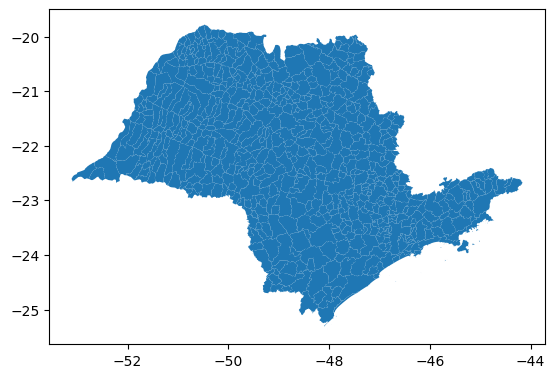

In [8]:
gdf_sp.plot()

Assim como faríamos com um gráfico gerado pelo `matplotlib`, podemos editar a figura passando diversos parâmetros para melhoria da visualização:

<Axes: >

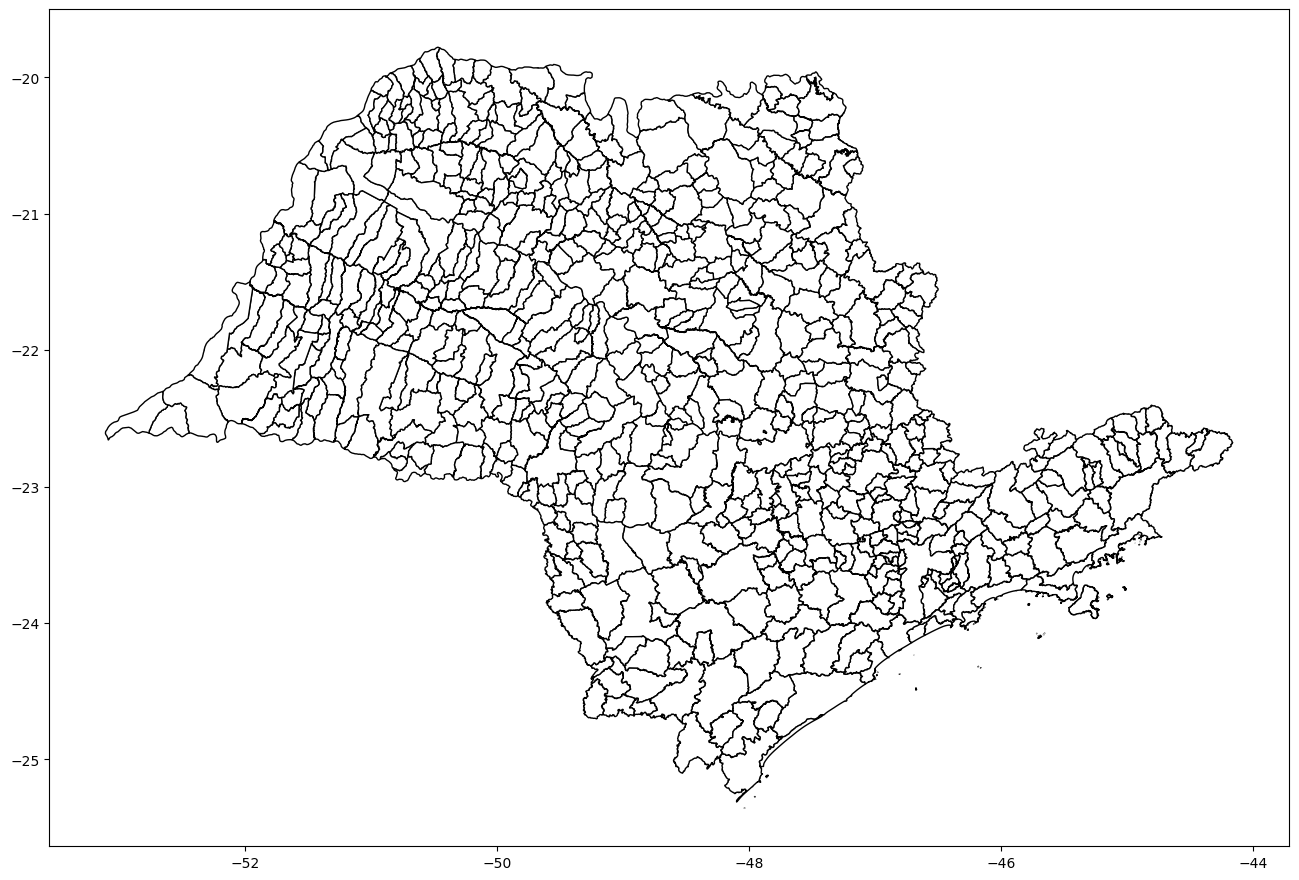

In [9]:
gdf_sp.plot(figsize=(16, 14), facecolor="white", edgecolor="black")


Filtrar dados de um GeoDataframe segue a mesma sintaxe de um DataFrame do pandas, por exemplo, vamos filtrar apenas a capital de São Paulo:

In [10]:
gdf_sp.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.09557 -21.57029, -51.09617 -21.5..."
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.61249 -21.26110, -49.61249 -21.2..."
2,3500303,Aguaí,SP,474.554,"POLYGON ((-47.01254 -22.00527, -47.01219 -22.0..."
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.71875 -21.95837, -46.71878 -21.9..."
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.61761 -22.51172, -46.61864 -22.5..."


In [11]:
gdf_sp_capital = gdf_sp[gdf_sp["NM_MUN"] == "São Paulo"]

In [12]:
gdf_sp_capital

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
562,3550308,São Paulo,SP,1521.202,"POLYGON ((-46.63512 -23.83850, -46.63455 -23.8..."


<Axes: >

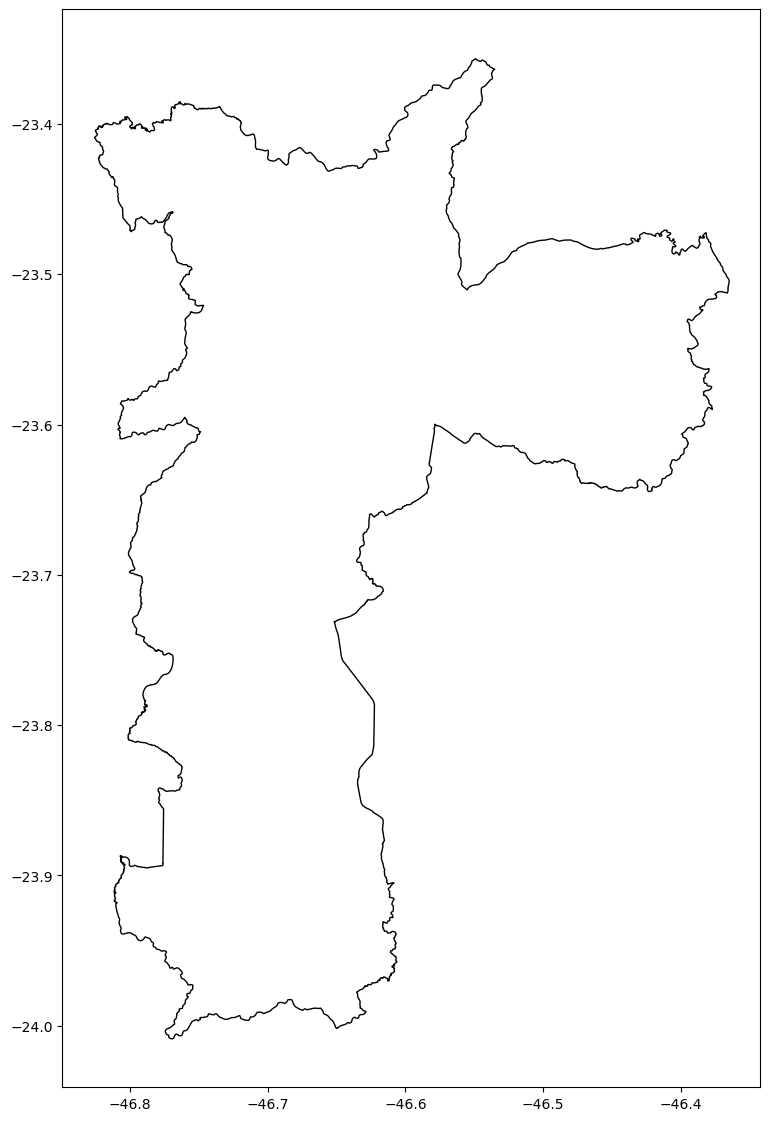

In [13]:
gdf_sp_capital.plot(figsize=(16, 14), facecolor="white", edgecolor="black")

## Exportando dados

Para exportar dados, utilizamos o método `to_file()`. Por padrão, o GeoPandas utiliza o formato `shp` (shapefile). Contudo, um formato que tem ganhado muita popularidade é o `GeoJASON`. Este formato de arquivo difere dos demais por não ser mantido por uma organização de [padrões GIS](https://en.wikipedia.org/wiki/Geographic_information_system), mas por uma comunidade de desenvolvedores. É um formato padrão aberto baseado no formato JSON (Javascript Object Notation) e herda as facilidade de leitura, integração e escrita do JSON. 

O GeoPandas é capaz de converter e exportar dados em diferentes formatos utilizando os _drivers_ apropriados. No caso do formato `GeoJSON`, utilizamos o drive `GeoJSON` como parâmetro do métodos `to_file()`:

In [19]:
gdf_sp_capital.to_file("data/SP_capital.json", driver="GeoJSON")

Por fim, para lermos o arquivo no formato `GeoJSON`, passamo o parâmetro `driver` para o método `read_file()`:

In [8]:
filename = "data/processed/SP_capital.json"

gdf_sp_json = gpd.read_file(filename, driver="GeoJSON")

gdf_sp_json

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3550308,São Paulo,SP,1521.202,"POLYGON ((-46.63512 -23.83850, -46.63455 -23.8..."
